# DATA 620, Project 3

### Group 1 Members:

* Mauricio Alarcon
* Sekhar Mekala 
* Aadi Kalloo
* Srinivasa Illapani
* Param Singh 

### Project Requirements

**This is a Team Project!  For this project, please work with the entire class as one collaborative group!  Your project should be submitted (as an IPython Notebook via GitHub) by end of day on Monday, July 10th.  The group should present their code and findings in our meet-up on Tuesday July 11th.**


Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can. Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set. How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect? 

In [1]:
from nltk.corpus import names as names_ntlk
import nltk
import pandas as pd
import matplotlib
import statistics
import scipy


nltk.download("names")

[nltk_data] Downloading package names to /Users/malarcon/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [2]:
%matplotlib inline

In [3]:
matplotlib.style.use('ggplot')

## Data Loading

In [4]:
import random
names = ([( name, 'male') for name in names_ntlk.words('male.txt')] + [( name, 'female') for name in names_ntlk.words('female.txt')]) 
random.seed(1234)
random.shuffle(names)
names


[(u'Garwin', 'male'),
 (u'Cindie', 'female'),
 (u'Juanita', 'male'),
 (u'Dael', 'female'),
 (u'Jillayne', 'female'),
 (u'Sean', 'male'),
 (u'Nell', 'female'),
 (u'Christie', 'male'),
 (u'Shannen', 'female'),
 (u'Jessamine', 'female'),
 (u'Averill', 'male'),
 (u'Lacey', 'female'),
 (u'Tandi', 'female'),
 (u'Towny', 'male'),
 (u'Meg', 'female'),
 (u'Claudia', 'female'),
 (u'Mitch', 'male'),
 (u'Otha', 'female'),
 (u'April', 'female'),
 (u'Vergil', 'male'),
 (u'Barbara', 'female'),
 (u'Jacquie', 'female'),
 (u'Larry', 'male'),
 (u'Josefina', 'female'),
 (u'Ellissa', 'female'),
 (u'Illa', 'female'),
 (u'Camilla', 'female'),
 (u'Cabrina', 'female'),
 (u'Adiana', 'female'),
 (u'Dyson', 'male'),
 (u'Farrah', 'female'),
 (u'Tabor', 'male'),
 (u'Christophe', 'male'),
 (u'Giffer', 'male'),
 (u'Avis', 'female'),
 (u'Erinn', 'female'),
 (u'Aurilia', 'female'),
 (u'Carey', 'female'),
 (u'Dabney', 'male'),
 (u'Sula', 'female'),
 (u'Chariot', 'male'),
 (u'Heida', 'female'),
 (u'Aggie', 'female'),
 (u

In [5]:
len(names)

7944

In [6]:
test_dataset = names[:500]
print "test_dataset: ", len(test_dataset)
devtest_dataset = names[500:1000]
print "devtest_dataset: ",len(test_dataset)
train_dataset = names[1000:]
print "train_dataset: ",len(train_dataset)

test_dataset:  500
devtest_dataset:  500
train_dataset:  6944


## Model Building

### Baseline Model

Let's calculate the accuracy for the initial model as described in the book

In [7]:
# Book's classifier - baseline


def gender_features( word):
    w = word.lower()
    return {'last_letter': w[-1]} 

test_featureset = [(gender_features(n),g) for (n,g) in test_dataset]
devtest_featureset = [(gender_features(n),g) for (n,g) in devtest_dataset]
train_featureset = [(gender_features(n),g) for (n,g) in train_dataset]

classifier = nltk.NaiveBayesClassifier.train( train_featureset)

print 'Accuracy: %4.2f' %nltk.classify.accuracy( classifier, devtest_featureset)


Accuracy: 0.75


Let's now add some features to it such as:

* Entropy
* First Trigram
* Last Trigram

by adding a feature at a time and see what happens

### Baseline + Last Trigram

In [8]:
#from nltk.classify import apply_features
import math 
def entropy( labels): 
    freqdist = nltk.FreqDist( labels) 
    probs = [freqdist.freq( l) for l in nltk.FreqDist( labels)] 
    return -sum([ p * math.log( p, 2) for p in probs])

    
def gender_features( word):
    w = word.lower()
    return {'last_letter': w[-1],'last_trigram': w[-3:]} #,'last_bigram': word[-2:]

test_featureset = [(gender_features(n),g) for (n,g) in test_dataset]
devtest_featureset = [(gender_features(n),g) for (n,g) in devtest_dataset]
train_featureset = [(gender_features(n),g) for (n,g) in train_dataset]
print test_featureset[1]
classifier = nltk.NaiveBayesClassifier.train( train_featureset)

print 'Accuracy: %4.2f' %nltk.classify.accuracy( classifier, devtest_featureset)


({'last_letter': u'e', 'last_trigram': u'die'}, 'female')
Accuracy: 0.77


### Baseline + Last Trigram + First Trigram

In [9]:
#from nltk.classify import apply_features
import math 
def entropy( labels): 
    freqdist = nltk.FreqDist( labels) 
    probs = [freqdist.freq( l) for l in nltk.FreqDist( labels)] 
    return -sum([ p * math.log( p, 2) for p in probs])

    
def gender_features( word):
    w = word.lower()
    return {'last_letter': w[-1],'last_trigram': w[-3:],'first_trigram': w[:3]} #,'last_bigram': word[-2:]

test_featureset = [(gender_features(n),g) for (n,g) in test_dataset]
devtest_featureset = [(gender_features(n),g) for (n,g) in devtest_dataset]
train_featureset = [(gender_features(n),g) for (n,g) in train_dataset]
print test_featureset[1]
classifier = nltk.NaiveBayesClassifier.train( train_featureset)

print 'Accuracy: %4.2f' %nltk.classify.accuracy( classifier, devtest_featureset)


({'first_trigram': u'cin', 'last_letter': u'e', 'last_trigram': u'die'}, 'female')
Accuracy: 0.81


### Baseline + Last Trigram + First Trigram + Entropy

In [10]:
#from nltk.classify import apply_features
import math 
def entropy( labels): 
    freqdist = nltk.FreqDist( labels) 
    probs = [freqdist.freq( l) for l in nltk.FreqDist( labels)] 
    return -sum([ p * math.log( p, 2) for p in probs])

    
def gender_features( word):
    w = word.lower()
    return {'last_letter': w[-1],'last_trigram': w[-3:],'first_trigram': w[:3], 'entropy': entropy(list(w))} #,'last_bigram': word[-2:]

test_featureset = [(gender_features(n),g) for (n,g) in test_dataset]
devtest_featureset = [(gender_features(n),g) for (n,g) in devtest_dataset]
train_featureset = [(gender_features(n),g) for (n,g) in train_dataset]
print test_featureset[1]
classifier = nltk.NaiveBayesClassifier.train( train_featureset)

print 'Accuracy: %4.2f' %nltk.classify.accuracy( classifier, devtest_featureset)


({'first_trigram': u'cin', 'entropy': 2.2516291673878226, 'last_letter': u'e', 'last_trigram': u'die'}, 'female')
Accuracy: 0.82


### Looking at Entropy and Model Performance

In [11]:
print entropy('mauricio')
print entropy('ma')
print entropy('mohammed')
print entropy('samantha')
print entropy('mo')
print entropy('sal')
print entropy('sam')

2.75
1.0
2.40563906223
2.40563906223
1.0
1.58496250072
1.58496250072


In [12]:
classifier.classify( gender_features('Mauricio'))


'male'

In [13]:
preds = pd.DataFrame({'observed':[gender for (f,gender) in devtest_dataset],'predicted': [classifier.classify(gender_features(n)) for (n,g) in devtest_dataset]})
pd.crosstab(preds.observed,preds.predicted)

predicted,female,male
observed,,
female,273,50
male,39,138


In [14]:

#print 'Precision: %4.2f' %nltk.classify.precision( classifier, devtest_featureset)
cm = nltk.ConfusionMatrix([gender for (f,gender) in devtest_featureset], [classifier.classify(gender_features(n)) for (n,g) in devtest_dataset])
#[(gender_features(n),g) for (n,g) in devtest_dataset]

In [15]:
cm

<ConfusionMatrix: 411/500 correct>

In [16]:
classifier.show_most_informative_features()


Most Informative Features
             last_letter = u'a'           female : male   =     42.4 : 1.0
            last_trigram = u'nne'         female : male   =     31.1 : 1.0
             last_letter = u'k'             male : female =     29.8 : 1.0
            last_trigram = u'ita'         female : male   =     24.2 : 1.0
            last_trigram = u'ana'         female : male   =     23.4 : 1.0
            last_trigram = u'tta'         female : male   =     22.5 : 1.0
            last_trigram = u'ard'           male : female =     20.2 : 1.0
            last_trigram = u'vin'           male : female =     18.2 : 1.0
            last_trigram = u'old'           male : female =     15.0 : 1.0
             last_letter = u'f'             male : female =     14.6 : 1.0


In [17]:
classifier.most_informative_features()

[('last_letter', u'a'),
 ('last_trigram', u'nne'),
 ('last_letter', u'k'),
 ('last_trigram', u'ita'),
 ('last_trigram', u'ana'),
 ('last_trigram', u'tta'),
 ('last_trigram', u'ard'),
 ('last_trigram', u'vin'),
 ('last_trigram', u'old'),
 ('last_letter', u'f'),
 ('first_trigram', u'gar'),
 ('first_trigram', u'tha'),
 ('last_trigram', u'ria'),
 ('last_trigram', u'dra'),
 ('first_trigram', u'cat'),
 ('last_trigram', u'ter'),
 ('last_trigram', u'ert'),
 ('last_trigram', u'son'),
 ('last_letter', u'v'),
 ('last_letter', u'm'),
 ('last_letter', u'p'),
 ('last_trigram', u'nni'),
 ('last_letter', u'd'),
 ('first_trigram', u'dor'),
 ('first_trigram', u'wal'),
 ('first_trigram', u'ros'),
 ('last_trigram', u'cia'),
 ('first_trigram', u'par'),
 ('last_trigram', u'ler'),
 ('last_trigram', u'van'),
 ('last_trigram', u'dor'),
 ('last_trigram', u'den'),
 ('last_trigram', u'ias'),
 ('entropy', 1.8423709931771088),
 ('last_letter', u'o'),
 ('last_trigram', u'lli'),
 ('last_trigram', u'isa'),
 ('first_tr

Not sure if this entropy business means anything, perhaps the entropy distribution for male/female names is different

Male Mean: 2.32
Male SD: 0.35


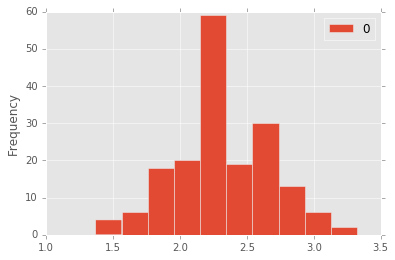

In [18]:

e_male = filter(None,[gender_features(n)['entropy'] if (g=='male') else None for (n,g) in devtest_dataset])
print 'Male Mean: %4.2f' %statistics.mean(e_male)
print 'Male SD: %4.2f' %statistics.stdev(e_male)
pd.DataFrame(e_male).plot.hist()

Female Mean: 2.27
Female SD: 0.37


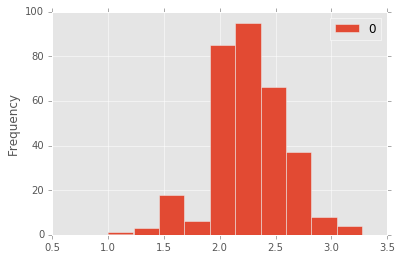

In [19]:
e_female = filter(None,[gender_features(n)['entropy'] if (g=='female') else None for (n,g) in devtest_dataset])
print 'Female Mean: %4.2f' %statistics.mean(e_female)
print 'Female SD: %4.2f' %statistics.stdev(e_female)
pd.DataFrame(e_female).plot.hist()

In [20]:

scipy.stats.ttest_ind(e_male,e_female)

Ttest_indResult(statistic=1.4909191968274809, pvalue=0.13661582489681476)

Although there is no statistical difference in the distribution of entropy values, the histograms appear to have a different configuration.

### Predictions

Let's run some predicitons now:

In [21]:
preds = pd.DataFrame({'name':[f for (f,gender) in test_dataset],'observed':[gender for (f,gender) in test_dataset],'predicted': [classifier.classify(gender_features(n)) for (n,g) in test_dataset]})

In [22]:
pd.crosstab(preds.observed,preds.predicted)

predicted,female,male
observed,,
female,267,39
male,37,157
